<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/code/01NAEX_L01_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [6]:
!pip install rpy2

In [7]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t


### 1. Plot of standard normal distribution probability function (from definition)

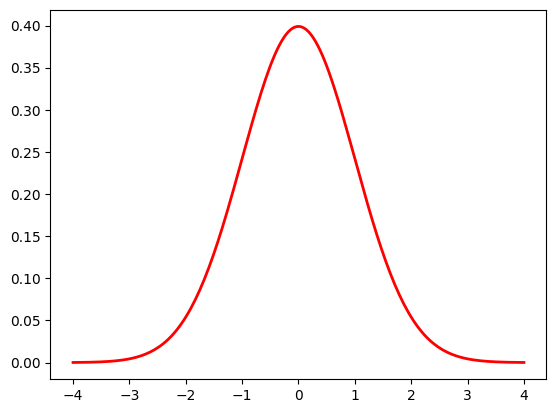

In [9]:

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 200)
y = (1/np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
plt.plot(x, y, 'r-', linewidth=2)
plt.show()


### 2. Plot of standard normal distribution probability function (used R function dnorm)

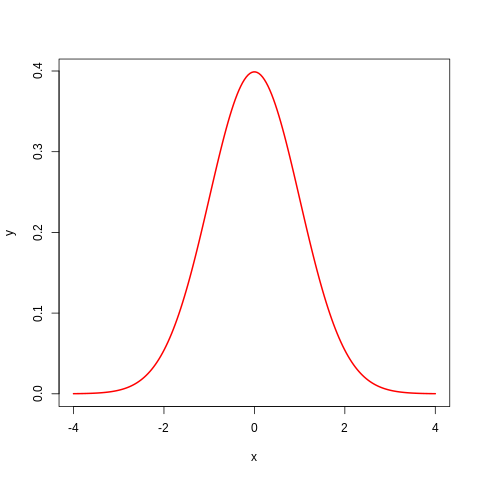

In [10]:

%%R
x = seq(-4,4,length=200)
y = 1/sqrt(2*pi)*exp(-x^2/2)
plot(x,y,type="l",lwd=2,col="red")


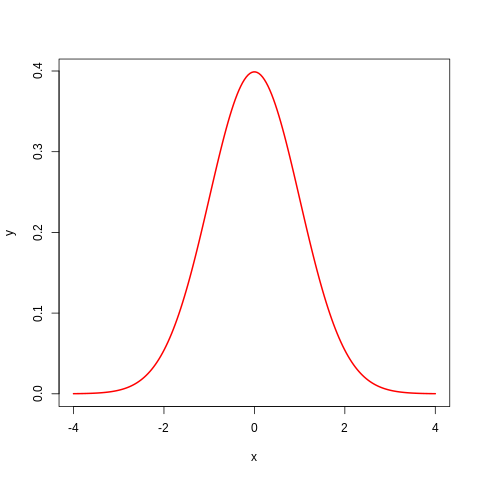

In [11]:

%%R
x=seq(-4,4,length=200)
y=dnorm(x,mean=0,sd=1)
plot(x,y,type="l",lwd=2,col="red")


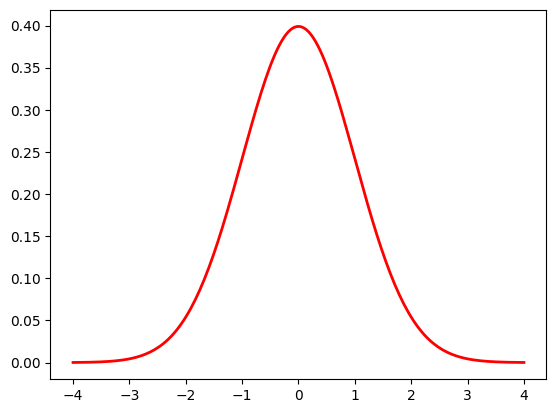

In [12]:
x = np.linspace(-4, 4, 200)
y = norm.pdf(x, 0, 1)
plt.plot(x, y, 'r-', linewidth=2)
plt.show()


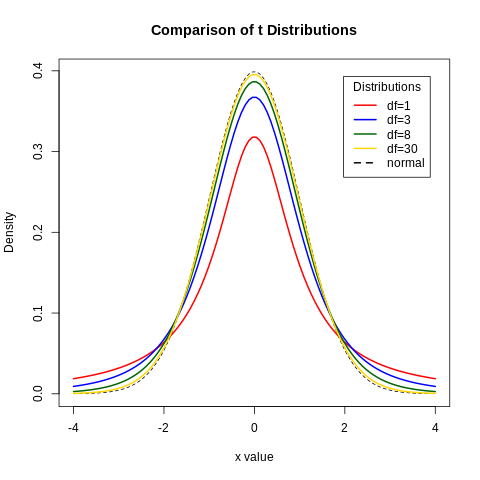

In [13]:
%%R

x <- seq(-4, 4, length=100)
hx <- dnorm(x)
degf <- c(1, 3, 8, 30)
colors <- c("red", "blue", "darkgreen", "gold", "black")
labels <- c("df=1", "df=3", "df=8", "df=30", "normal")
plot(x, hx, type="l", lty=2, xlab="x value", ylab="Density", main="Comparison of t Distributions")
for (i in 1:4){
lines(x, dt(x,degf[i]), lwd=2, col=colors[i])
}
legend("topright", inset=.05, title="Distributions", labels, lwd=2, lty=c(1, 1, 1, 1, 2), col=colors)

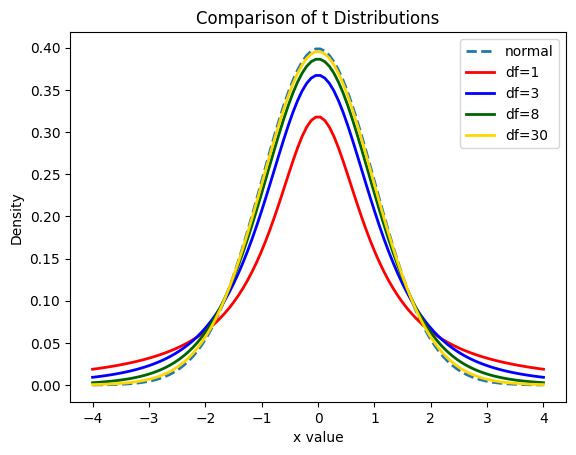

In [14]:
# Equivalent of seq(-4, 4, length=100) in Python
x = np.linspace(-4, 4, 100)

# Equivalent of dnorm(x) in Python
hx = norm.pdf(x)

# Defining the degrees of freedom, colors, and labels
degf = np.array([1, 3, 8, 30])
colors = ["red", "blue", "darkgreen", "gold", "black"]
labels = ["df=1", "df=3", "df=8", "df=30", "normal"]

# Plotting the normal distribution
plt.plot(x, hx, linestyle='dashed', linewidth=2, label='normal')

# Adding t-distributions to the plot
for i in range(4):
    plt.plot(x, t.pdf(x, df=degf[i]), linewidth=2, color=colors[i], label=labels[i])

# Adding labels and title
plt.xlabel('x value')
plt.ylabel('Density')
plt.title('Comparison of t Distributions')

# Adding legend
plt.legend(loc='upper right')

# Displaying the plot
plt.show()

## Visualizing Chi-squared Distributions

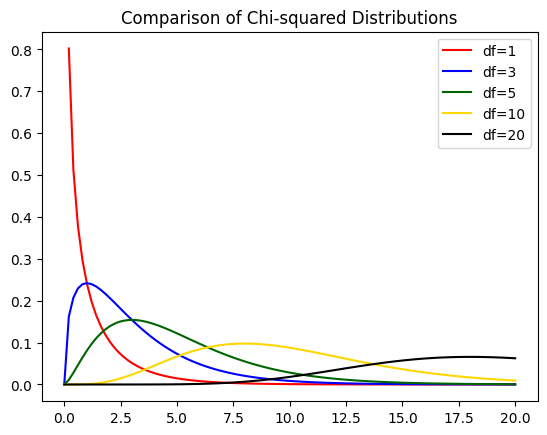

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.linspace(0, 20, 100)
degf = [1, 3, 5, 10, 20]
colors = ["red", "blue", "darkgreen", "gold", "black"]
labels = ["df=1", "df=3", "df=5", "df=10", "df=20"]

for i, df in enumerate(degf):
    plt.plot(x, stats.chi2.pdf(x, df), label=f"df={df}", color=colors[i])

plt.legend()
plt.title("Comparison of Chi-squared Distributions")
plt.show()

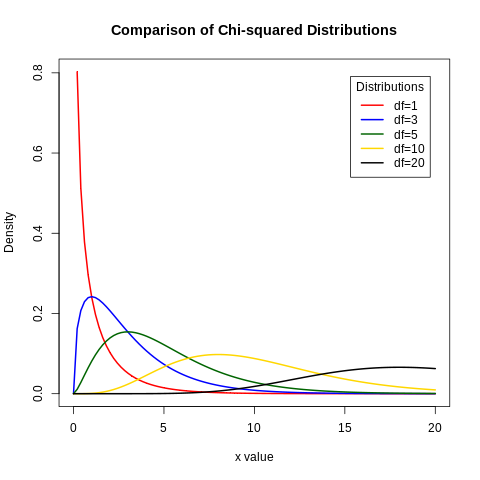

In [16]:
%%R

x      <- seq(0, 20, length=100)
degf   <- c(1, 3, 5, 10, 20)
colors <- c("red", "blue", "darkgreen", "gold", "black")
labels <- c("df=1", "df=3", "df=5", "df=10", "df=20")
plot(x, dchisq(x, degf[1]), pch=".", lwd=2, xlab="x value", col="red", ylab="Density", main="Comparison of Chi-squared Distributions")
for (i in 1:5){
    lines(x, dchisq(x, degf[i]), lwd=2, col=colors[i])
}
legend("topright", inset=.05, title="Distributions", labels, lwd=2, lty=c(1, 1, 1, 1, 1), col=colors)

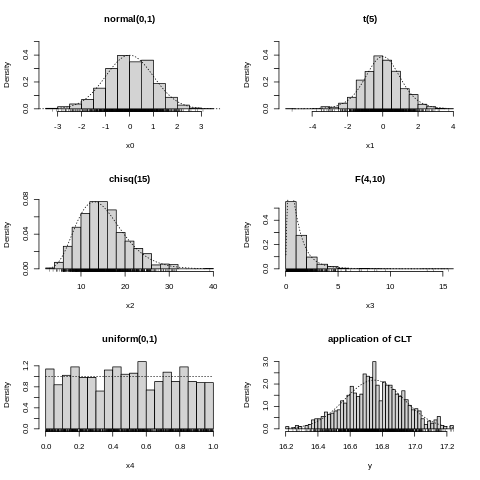

In [17]:
%%R


n = 1000                # number of observations
m = seq(-5, 5, 0.01)
cells = 18
x0 = rnorm(n,mean=0,sd=1)
x1 = rt(n,10)
x2 = rchisq(n, 15, ncp=0)
x3 = rf(n, 4, 10)
x4=  runif(n, 0, 1)
x6 = rlnorm(n, meanlog = 0, sdlog = 0.125)
x7 = rweibull(n, shape = 5, scale = 1)
for (k in 1:n) {
x0 = rnorm(n,mean=0,sd=1)
x1 = rt(n,10)
x2 = rchisq(n, 15, ncp=0)
x3 = rf(n, 4, 10)
x4=  runif(n, 0, 1)
y[k]  = sum(x0+x1+x2+x3+x4)/n
}
mean_y = 10/8 + 0.5 + 15
par(mfrow = c(3,2))
hist(  x0, breaks = cells, prob=TRUE, ylim = c(0,0.5),main="normal(0,1)")
lines( m, dnorm(m, mean=0, sd=1), lty=3)
rug(   x0)
hist(x1, breaks = cells, prob=TRUE, ylim = c(0,0.5), main="t(5)")
lines( seq(min(x1), max(x1), 0.01), dt(seq(min(x1), max(x1), 0.01),10), lty=3)
rug(   x1)
hist(x2, breaks = cells, prob=TRUE, main="chisq(15)")
lines( seq(min(x2), max(x2), 0.01), dchisq(seq(min(x2), max(x2), 0.01), 15), lty=3)
rug(   x2)
hist(x3, breaks = cells, prob=TRUE, main="F(4,10)")
lines( seq(min(x3), max(x3), 0.01), df(seq(min(x3), max(x3), 0.01), 4,10), lty=3)
rug(   x3)
hist(x4, breaks = cells, prob=TRUE, main="uniform(0,1)")
lines( seq(min(x4), max(x4), 0.01), dunif(seq(min(x4), max(x4), 0.01), 0, 1), lty=3)
rug(   x4)
#hist(x5, breaks = cells, prob=TRUE, main="lnorm(0,0.125)")
#lines( m, dlnorm(m, meanlog=0, sdlog = 0.125), lty=3)
#rug(   x5)
#hist(x6, breaks = cells, prob=TRUE, main="weibull(5,1)")
#lines( m, dweibull(m,shape = 5, scale = 1), lty=3)
#rug(   x6)
hist(y, breaks  = 3*cells, prob=TRUE, main="application of CLT")
lines( seq(min(y), max(y), 0.01), dnorm(seq(min(y), max(y), 0.01), mean=mean_y, sd=sqrt(var(y))), lty=3)
#lines(density(y, bw=0.5))
rug(   y)

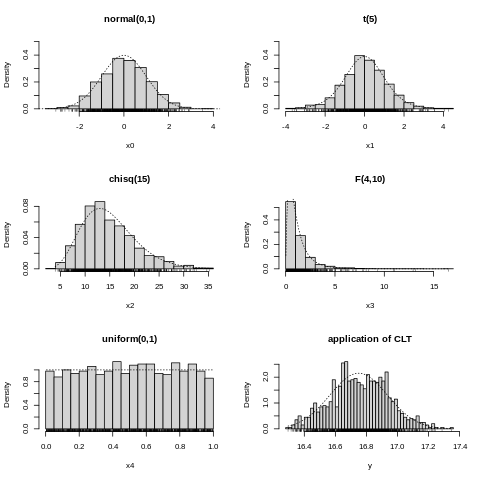

In [18]:
%%R

n = 1000
m = seq(-5, 5, 0.01)
cells = 18
x0 = rnorm(n,mean=0,sd=1)
x1 = rt(n,10)
x2 = rchisq(n, 15, ncp=0)
x3 = rf(n, 4, 10)
x4 = runif(n, 0, 1)
x6 = rlnorm(n, meanlog = 0, sdlog = 0.125)
x7 = rweibull(n, shape = 5, scale = 1)
for (k in 1:n) {
    x0 = rnorm(n,mean=0,sd=1)
    x1 = rt(n,10)
    x2 = rchisq(n, 15, ncp=0)
    x3 = rf(n, 4, 10)
    x4 = runif(n, 0, 1)
    y[k] = sum(x0+x1+x2+x3+x4)/n
}
mean_y = 10/8 + 0.5 + 15
par(mfrow = c(3,2))
hist(x0, breaks = cells, prob=TRUE, ylim = c(0,0.5),main="normal(0,1)")
lines(m, dnorm(m, mean=0, sd=1), lty=3)
rug(x0)
hist(x1, breaks = cells, prob=TRUE, ylim = c(0,0.5), main="t(5)")
lines( seq(min(x1), max(x1), 0.01), dt(seq(min(x1), max(x1), 0.01),10), lty=3)
rug(   x1)
hist(x2, breaks = cells, prob=TRUE, main="chisq(15)")
lines( seq(min(x2), max(x2), 0.01), dchisq(seq(min(x2), max(x2), 0.01), 15), lty=3)
rug(   x2)
hist(x3, breaks = cells, prob=TRUE, main="F(4,10)")
lines( seq(min(x3), max(x3), 0.01), df(seq(min(x3), max(x3), 0.01), 4,10), lty=3)
rug(   x3)
hist(x4, breaks = cells, prob=TRUE, main="uniform(0,1)")
lines( seq(min(x4), max(x4), 0.01), dunif(seq(min(x4), max(x4), 0.01), 0, 1), lty=3)
rug(   x4)
hist(y, breaks  = 3*cells, prob=TRUE, main="application of CLT")
lines( seq(min(y), max(y), 0.01), dnorm(seq(min(y), max(y), 0.01), mean=mean_y, sd=sqrt(var(y))), lty=3)
rug(   y)

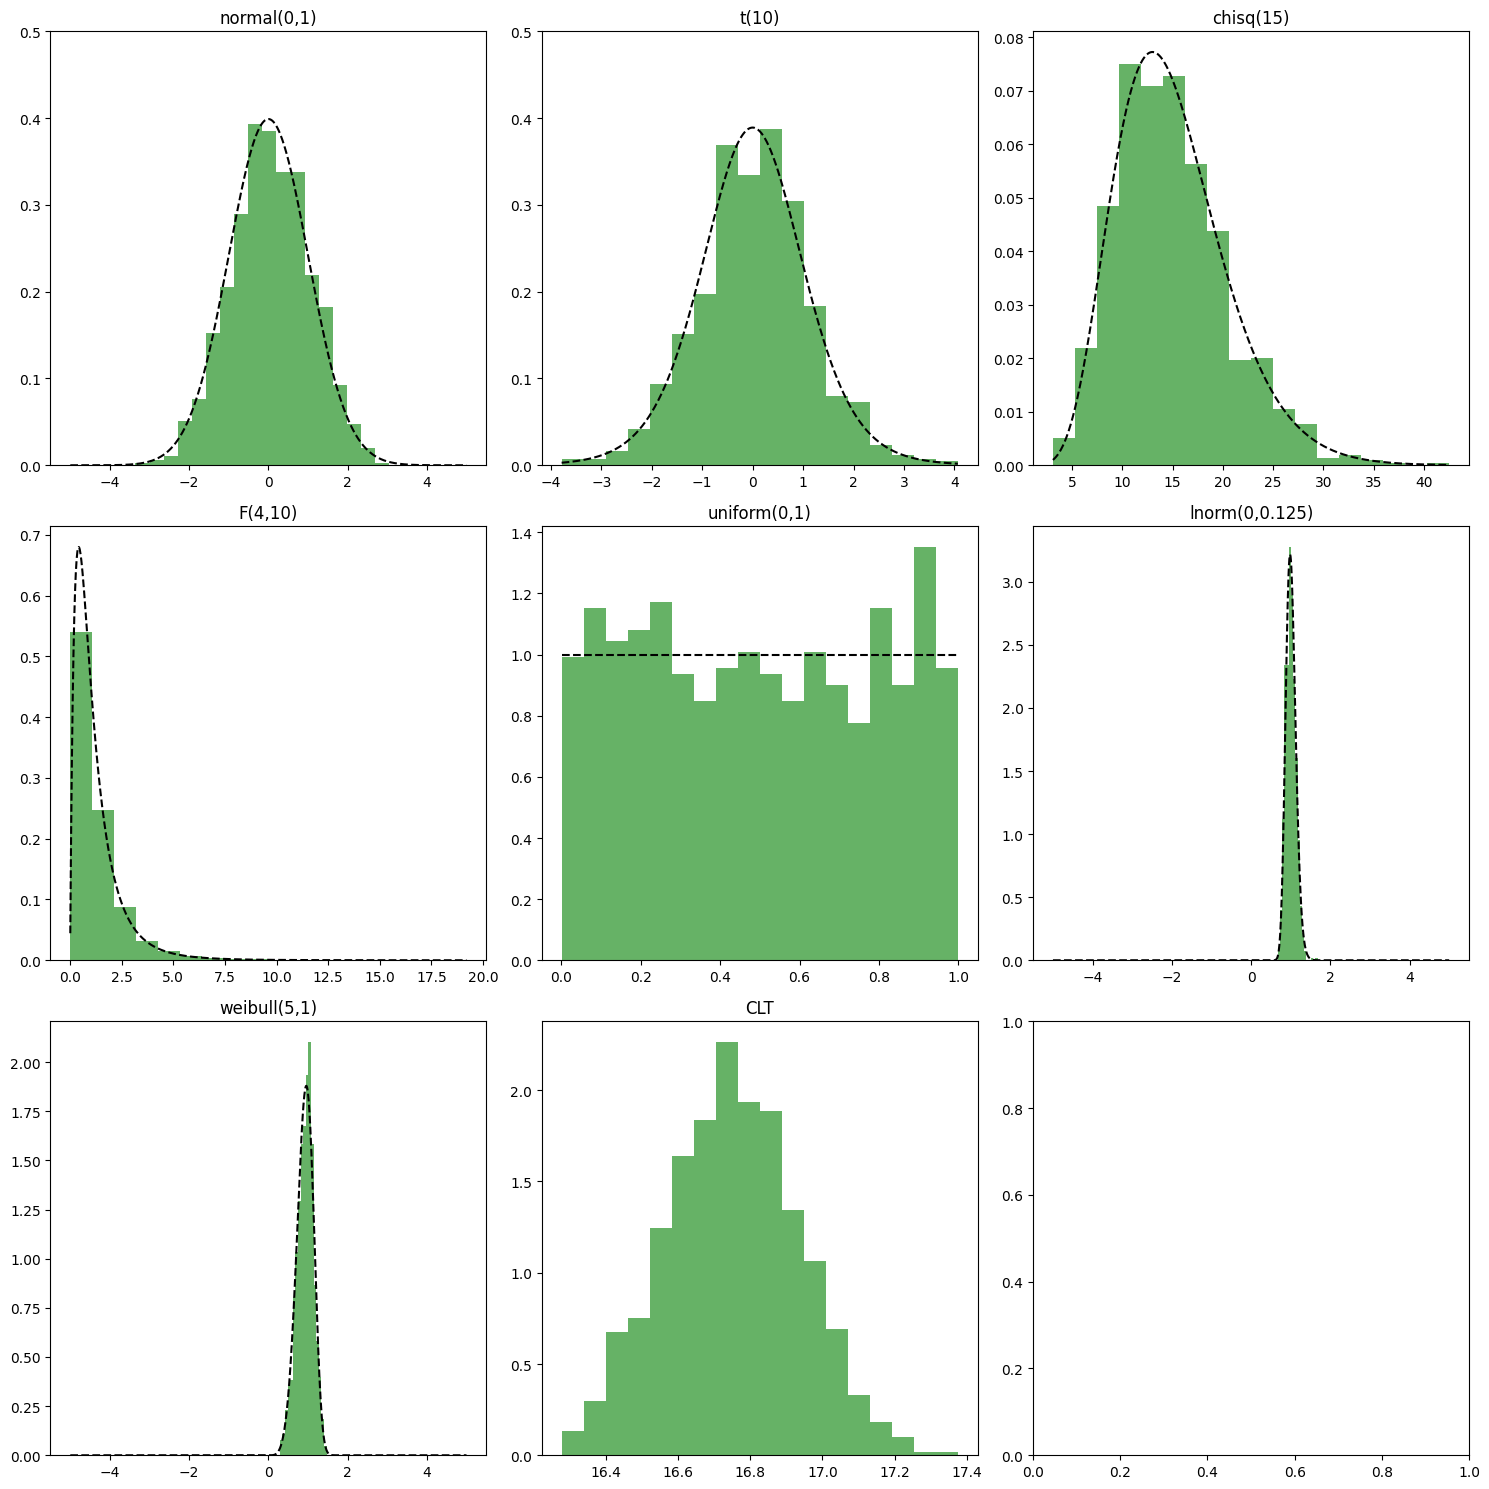

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, chi2, f, uniform, lognorm, weibull_min

n = 1000
m = np.linspace(-5, 5, 1000)  # Equivalent to seq(-5, 5, 0.01)
cells = 18

x0 = np.random.normal(loc=0, scale=1, size=n)
x1 = np.random.standard_t(df=10, size=n)
x2 = np.random.chisquare(df=15, size=n)
x3 = np.random.f(4, 10, n)
x4 = np.random.uniform(low=0, high=1, size=n)
x6 = np.random.lognormal(mean=0, sigma=0.125, size=n)
x7 = weibull_min.rvs(c=5, scale=1, size=n)

y = np.empty(n)
for k in range(n):
    x0 = np.random.normal(loc=0, scale=1, size=n)
    x1 = np.random.standard_t(df=10, size=n)
    x2 = np.random.chisquare(df=15, size=n)
    x3 = np.random.f(4, 10, n)
    x4 = np.random.uniform(low=0, high=1, size=n)
    y[k] = np.sum(x0 + x1 + x2 + x3 + x4) / n

mean_y = 10 / 8 + 0.5 + 15

fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # Adjusted to 3x3 to fit all plots

# Histogram for x0 - Normal distribution
axs[0, 0].hist(x0, bins=cells, density=True, alpha=0.6, color='g')
axs[0, 0].plot(m, norm.pdf(m, loc=0, scale=1), 'k--')
axs[0, 0].set_title('normal(0,1)')
axs[0, 0].set_ylim(0, 0.5)

# Histogram for x1 - t distribution
axs[0, 1].hist(x1, bins=cells, density=True, alpha=0.6, color='g')
axs[0, 1].plot(np.linspace(min(x1), max(x1), 1000), t.pdf(np.linspace(min(x1), max(x1), 1000), df=10), 'k--')
axs[0, 1].set_title('t(10)')
axs[0, 1].set_ylim(0, 0.5)

# Histogram for x2 - Chi-square distribution
axs[0, 2].hist(x2, bins=cells, density=True, alpha=0.6, color='g')
axs[0, 2].plot(np.linspace(min(x2), max(x2), 1000), chi2.pdf(np.linspace(min(x2), max(x2), 1000), df=15), 'k--')
axs[0, 2].set_title('chisq(15)')

# Histogram for x3 - F distribution
axs[1, 0].hist(x3, bins=cells, density=True, alpha=0.6, color='g')
axs[1, 0].plot(np.linspace(min(x3), max(x3), 1000), f.pdf(np.linspace(min(x3), max(x3), 1000), dfn=4, dfd=10), 'k--')
axs[1, 0].set_title('F(4,10)')

# Histogram for x4 - Uniform distribution
axs[1, 1].hist(x4, bins=cells, density=True, alpha=0.6, color='g')
axs[1, 1].plot(np.linspace(min(x4), max(x4), 1000), uniform.pdf(np.linspace(min(x4), max(x4), 1000), loc=0, scale=1), 'k--')
axs[1, 1].set_title('uniform(0,1)')

# Histogram for x6 - Log-normal distribution
axs[1, 2].hist(x6, bins=cells, density=True, alpha=0.6, color='g')
axs[1, 2].plot(m, lognorm.pdf(m, s=0.125, scale=np.exp(0)), 'k--')
axs[1, 2].set_title('lnorm(0,0.125)')

# Histogram for x7 - Weibull distribution
axs[2, 0].hist(x7, bins=cells, density=True, alpha=0.6, color='g')
axs[2, 0].plot(m, weibull_min.pdf(m, c=5, scale=1), 'k--')
axs[2, 0].set_title('weibull(5,1)')

# Histogram for x7 - CLT
axs[2, 1].hist(y, bins=cells, density=True, alpha=0.6, color='g')
#axs[2, 1].plot(m, weibull_min.pdf(m, c=5, scale=1), 'k--')
axs[2, 1].set_title('CLT')


plt.tight_layout()
plt.show()


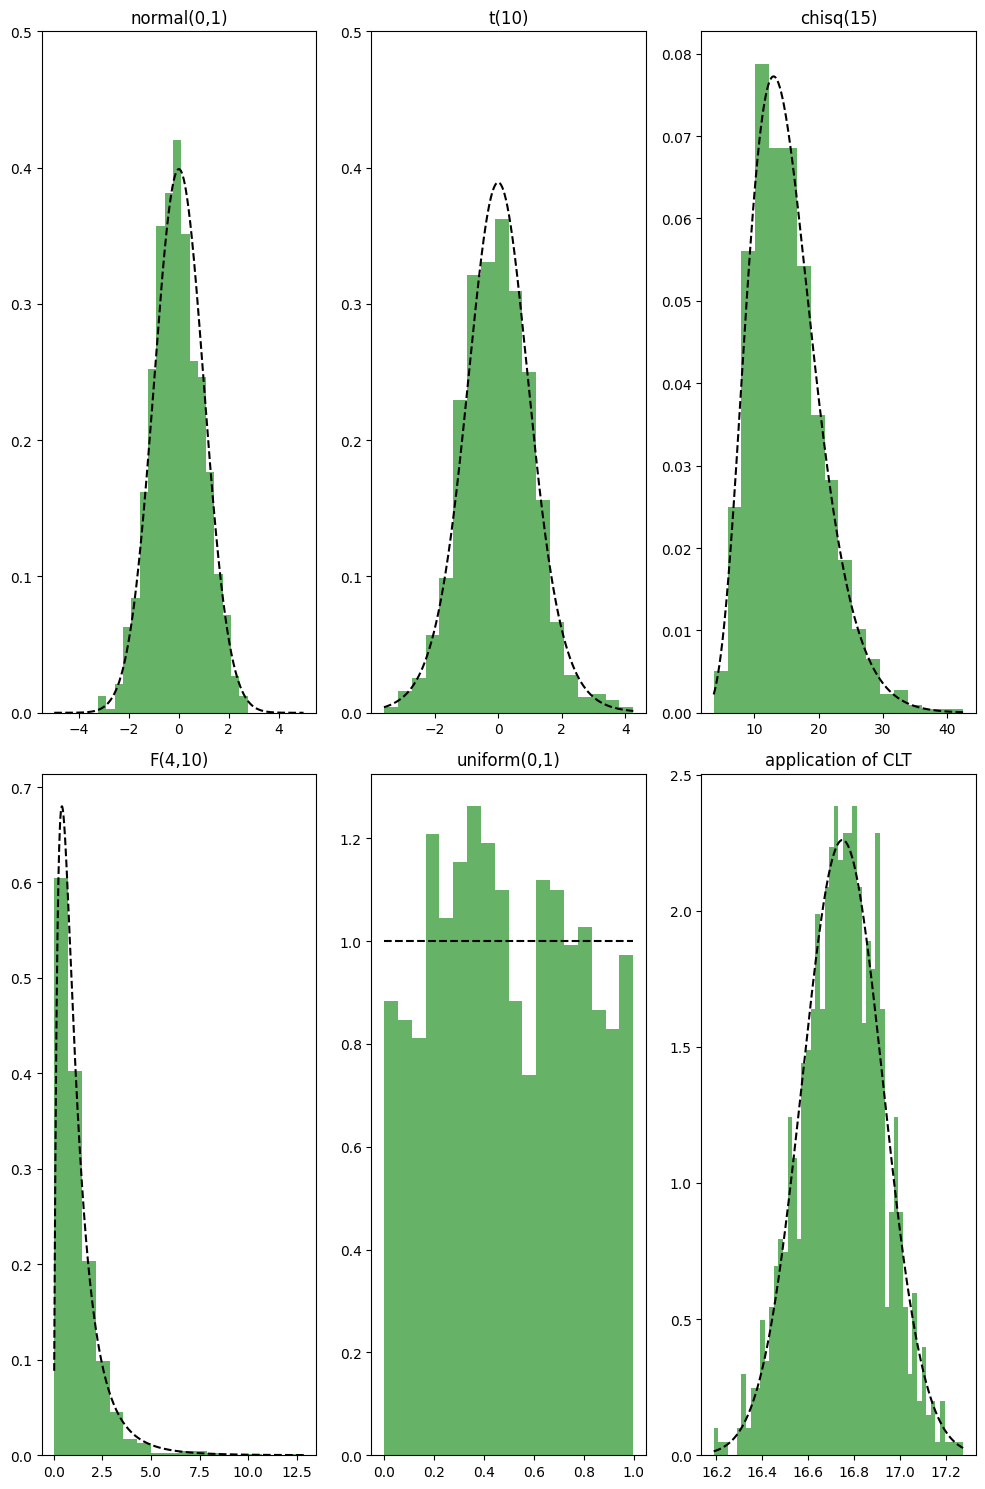

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, chi2, f, uniform, lognorm, weibull_min

n = 1000
m = np.linspace(-5, 5, 1000)  # Equivalent to seq(-5, 5, 0.01)
cells = 18

x0 = np.random.normal(loc=0, scale=1, size=n)
x1 = np.random.standard_t(df=10, size=n)
x2 = np.random.chisquare(df=15, size=n)
x3 = np.random.f(4, 10, n)
x4 = np.random.uniform(low=0, high=1, size=n)
x6 = np.random.lognormal(mean=0, sigma=0.125, size=n)
x7 = weibull_min.rvs(c=5, scale=1, size=n)

y = np.empty(n)
for k in range(n):
    x0 = np.random.normal(loc=0, scale=1, size=n)
    x1 = np.random.standard_t(df=10, size=n)
    x2 = np.random.chisquare(df=15, size=n)
    x3 = np.random.f(4, 10, n)
    x4 = np.random.uniform(low=0, high=1, size=n)
    y[k] = np.sum(x0 + x1 + x2 + x3 + x4) / n

mean_y = 10 / 8 + 0.5 + 15

fig, axs = plt.subplots(2, 3, figsize=(10, 15))


# Histogram for x0 - Normal distribution
axs[0, 0].hist(x0, bins=cells, density=True, alpha=0.6, color='g')
axs[0, 0].plot(m, norm.pdf(m, loc=0, scale=1), 'k--')
axs[0, 0].set_title('normal(0,1)')
axs[0, 0].set_ylim(0, 0.5)

# Histogram for x1 - t distribution
axs[0, 1].hist(x1, bins=cells, density=True, alpha=0.6, color='g')
axs[0, 1].plot(np.linspace(min(x1), max(x1), 1000), t.pdf(np.linspace(min(x1), max(x1), 1000), df=10), 'k--')
axs[0, 1].set_title('t(10)')
axs[0, 1].set_ylim(0, 0.5)

# Histogram for x2 - Chi-square distribution
axs[0, 2].hist(x2, bins=cells, density=True, alpha=0.6, color='g')
axs[0, 2].plot(np.linspace(min(x2), max(x2), 1000), chi2.pdf(np.linspace(min(x2), max(x2), 1000), df=15), 'k--')
axs[0, 2].set_title('chisq(15)')

# Histogram for x3 - F distribution
axs[1, 0].hist(x3, bins=cells, density=True, alpha=0.6, color='g')
axs[1, 0].plot(np.linspace(min(x3), max(x3), 1000), f.pdf(np.linspace(min(x3), max(x3), 1000), dfn=4, dfd=10), 'k--')
axs[1, 0].set_title('F(4,10)')

# Histogram for x4 - Uniform distribution
axs[1, 1].hist(x4, bins=cells, density=True, alpha=0.6, color='g')
axs[1, 1].plot(np.linspace(min(x4), max(x4), 1000), uniform.pdf(np.linspace(min(x4), max(x4), 1000), loc=0, scale=1), 'k--')
axs[1, 1].set_title('uniform(0,1)')

# Histogram for y - application of CLT
axs[1, 2].hist(y, bins=3 * cells, density=True, alpha=0.6, color='g')
axs[1, 2].plot(np.linspace(min(y), max(y), 1000), norm.pdf(np.linspace(min(y), max(y), 1000), loc=mean_y, scale=np.sqrt(np.var(y))), 'k--')
axs[1, 2].set_title('application of CLT')

plt.tight_layout()
plt.show()


## Tension Bond Strength Data Visualization

<ipython-input-21-1125ada990f4>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax[1].plot(x, p, 'k', color='red', label='Fitted')


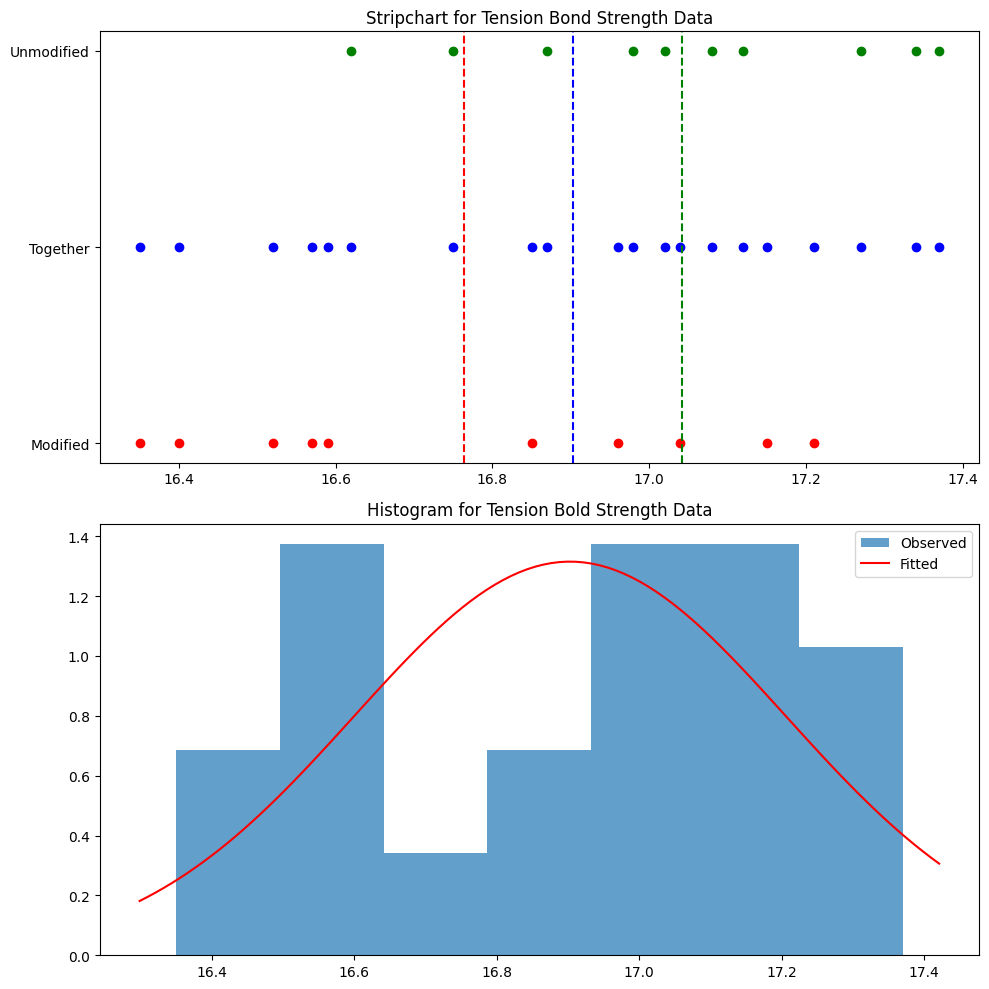

In [21]:

y1 = [16.85,16.40,17.21,16.35,16.52,17.04,16.96,17.15,16.59,16.57]
y2 = [16.62,16.75,17.37,17.12,16.98,16.87,17.34,17.02,17.08,17.27]
y = y1 + y2
y_means = [np.mean(y1), np.mean(y), np.mean(y2)]

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Stripchart
ax[0].scatter(y1, [1] * len(y1), marker='o', color='red', label='Modified')
ax[0].scatter(y, [2] * len(y), marker='o', color='blue', label='Together')
ax[0].scatter(y2, [3] * len(y2), marker='o', color='green', label='Unmodified')
ax[0].axvline(y_means[0], color='red', linestyle='--')
ax[0].axvline(y_means[1], color='blue', linestyle='--')
ax[0].axvline(y_means[2], color='green', linestyle='--')
ax[0].set_yticks([1, 2, 3])
ax[0].set_yticklabels(['Modified', 'Together', 'Unmodified'])
ax[0].set_title('Stripchart for Tension Bond Strength Data')

# Histogram
ax[1].hist(y, bins=7, density=True, alpha=0.7, label='Observed')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(y), np.std(y))
ax[1].plot(x, p, 'k', color='red', label='Fitted')
ax[1].set_title('Histogram for Tension Bold Strength Data')
ax[1].legend()

plt.tight_layout()
plt.show()


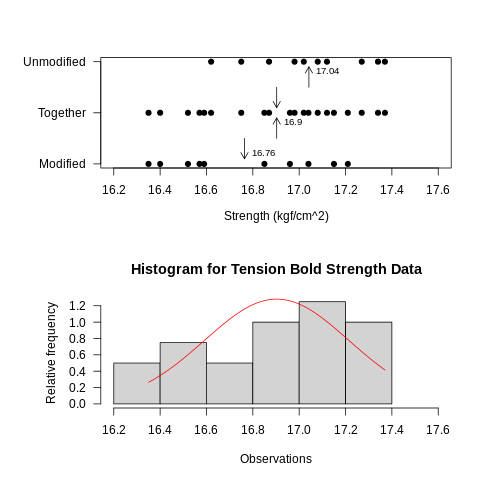

In [22]:

%%R

# Tension Bond Strength data (Tab. 2-1, p. 24)
y1      = c(16.85,16.40,17.21,16.35,16.52,17.04,16.96,17.15,16.59,16.57)
y2      = c(16.62,16.75,17.37,17.12,16.98,16.87,17.34,17.02,17.08,17.27)
y       = c(y1,y2)
y.means = c(mean(y1),mean(y),mean(y2))

opar    = par(mfrow=c(2,1),mar=c(5,7,4,2),las=1)
stripchart(list(Modified=y1,Together=y,Unmodified=y2), xlab=expression("Strength (kgf/cm^2)"), pch=19, xlim = c(16.2, 17.6))
arrows(c(y.means, y.means[2]), c(1.5, 1.5, 2.5, 2.5), c(y.means, y.means[2]), c(1.1, 1.9, 2.9, 2.1), length=0.1)
text(y.means, c(1.2, 1.8, 2.8), round(y.means, 2), pos=4, cex=0.8)
hist(y, xlab="Observations", ylab="Relative frequency", main="Histogram for Tension Bold Strength Data", breaks=7, freq=FALSE, xlim=c(16.2, 17.6))
partition = seq(min(y), max(y), 0.01)
lines(partition, dnorm(partition, mean(y), sd(y)), col="red")
par(opar)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
'data.frame':	20 obs. of  2 variables:
 $ Strength    : num  16.9 16.4 17.2 16.4 16.5 ...
 $ Modification: Factor w/ 2 levels "Modified","Unmodified": 1 1 1 1 1 1 1 1 1 1 ...


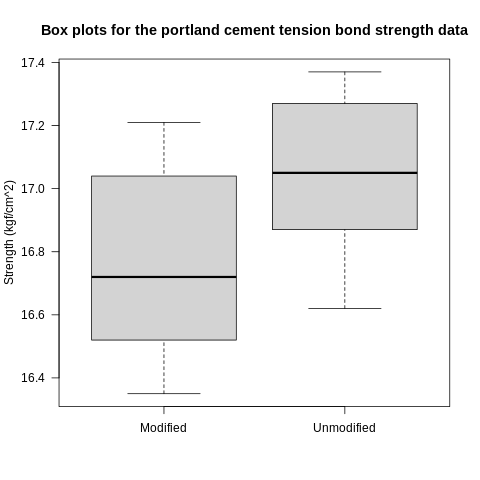

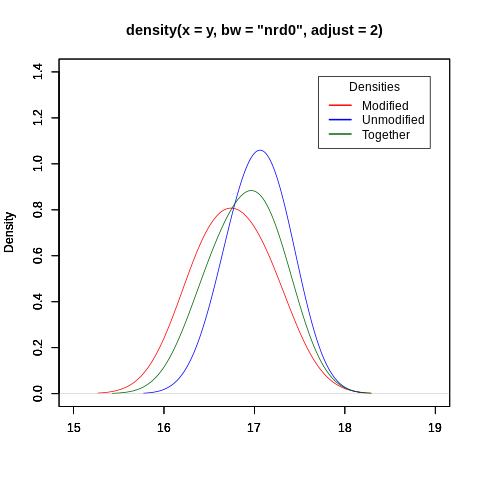

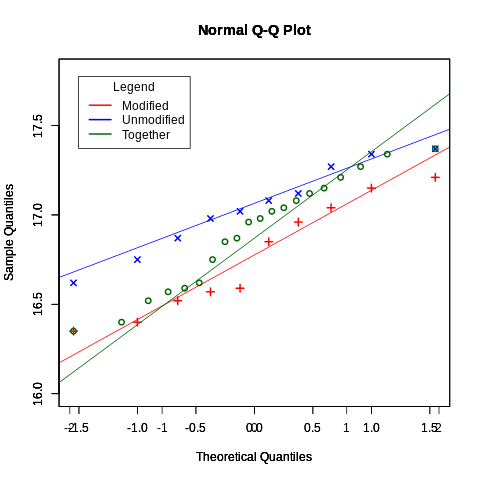

In [23]:
%%R
library(tidyverse)

boxplot(data.frame(Modified=y1,Unmodified=y2),ylab="Strength (kgf/cm^2)",las=1, main = "Box plots for the portland cement tension bond strength data")


cement_data = data.frame(Strength=c(y1,y2),
                         Modification = c(rep("Modified",times=length(y1)),
                                          rep("Unmodified",times=length(y2)))) %>%
  mutate(Modification = factor(Modification))
summary(cement_data)
str(cement_data)


ggplot(cement_data, aes(x=Modification, y=Strength,fill = Modification)) +
  geom_boxplot()+
  geom_jitter() +
  theme_classic()


## est densities
colors <- c("red", "blue", "darkgreen")
labels <- c("Modified", "Unmodified", "Together")
plot(density(y1,bw = "nrd0", adjust = 2,), xlim = c(15,19), ylim = c(0,1.4), col = colors[1], xlab = "", main = "")
par(new=TRUE)
plot(density(y2,bw = "nrd0", adjust = 2,), xlim = c(15,19), ylim = c(0,1.4), col = colors[2], xlab = "", main = "")
par(new=TRUE)
plot(density(y,bw = "nrd0", adjust = 2,), xlim = c(15,19),  ylim = c(0,1.4), col = colors[3], xlab = "")
legend("topright", inset=.05, title="Densities", labels, lwd=2, lty=c(1, 1, 1), col=colors)



## Plot using a qqplot
colors <- c("red", "blue", "darkgreen")
labels <- c("Modified", "Unmodified", "Together")
plot.new()
qqnorm(y1, pch = 3, lwd = 2, col = "red", ylim = c(16, 17.8))
qqline(y1, col = "red")
par(new=TRUE)
qqnorm(y2, pch = 4, lwd = 2, col = "blue", ylim = c(16, 17.8))
qqline(y2, col = "blue")
par(new=TRUE)
qqnorm(y, pch = 1, lwd = 2, col = "darkgreen", ylim = c(16, 17.8))
qqline(y, col = "darkgreen")
legend("topleft", inset=.05, title="Legend", labels, lwd=2, lty=c(1, 1, 1), col=colors)



         Strength Modification
count   20.000000           20
unique        NaN            2
top           NaN     Modified
freq          NaN           10
mean    16.903000          NaN
std      0.311264          NaN
min     16.350000          NaN
25%     16.612500          NaN
50%     16.970000          NaN
75%     17.127500          NaN
max     17.370000          NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Strength      20 non-null     float64
 1   Modification  20 non-null     object 
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes
None


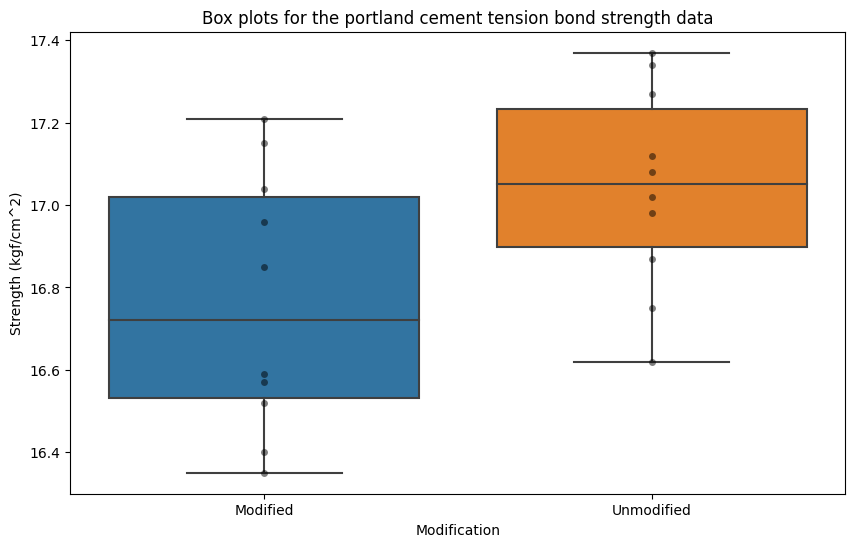

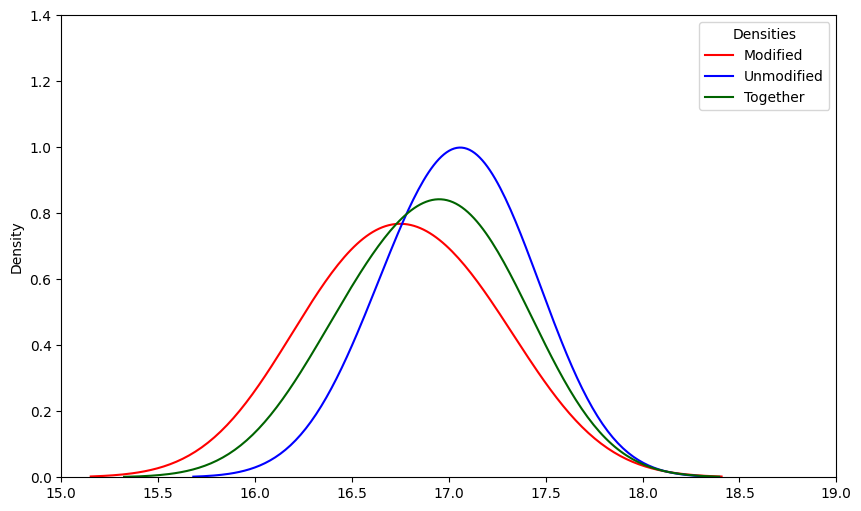

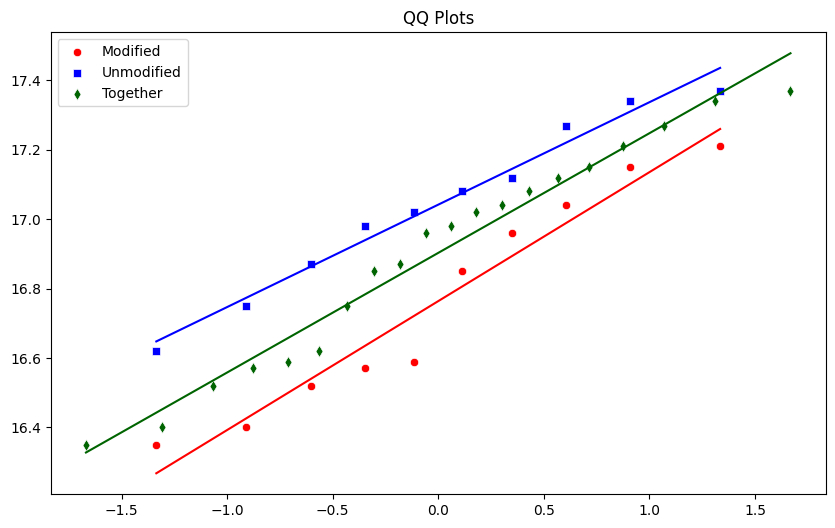

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Assuming y1 and y2 are already defined
# y1 = ...
# y2 = ...

# Boxplot and Data Preparation
modified = pd.DataFrame({'Strength': y1, 'Modification': 'Modified'})
unmodified = pd.DataFrame({'Strength': y2, 'Modification': 'Unmodified'})
cement_data = pd.concat([modified, unmodified], ignore_index=True)

# Display summary statistics
print(cement_data.describe(include='all'))
print(cement_data.info())

# Boxplot and Jitter using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Modification', y='Strength', data=cement_data)
sns.swarmplot(x='Modification', y='Strength', data=cement_data, color='black', alpha=0.5)
plt.title('Box plots for the portland cement tension bond strength data')
plt.ylabel('Strength (kgf/cm^2)')
plt.show()

# Density Estimation Plots
plt.figure(figsize=(10, 6))
sns.kdeplot(y1, bw_adjust=2, color='red', label='Modified')
sns.kdeplot(y2, bw_adjust=2, color='blue', label='Unmodified')
sns.kdeplot(np.concatenate((y1, y2)), bw_adjust=2, color='darkgreen', label='Together')
plt.legend(title='Densities')
plt.xlim(15, 19)
plt.ylim(0, 1.4)
plt.show()

# QQ Plots
fig, ax = plt.subplots(figsize=(10, 6))
def plot_qq(data, color, marker, label):
    # Calculate Quantiles and sort the data
    quantiles = np.sort(data)
    # Generate corresponding quantiles from a standard normal distribution
    norm_quantiles = stats.norm.ppf(np.linspace(0, 1, len(data) + 2)[1:-1])

    # Draw scatterplot for each dataset
    sns.scatterplot(x=norm_quantiles, y=quantiles, color=color, label=label, marker=marker, ax=ax)

    # Draw the QQ line
    z = np.polyfit(norm_quantiles, quantiles, 1)
    p = np.poly1d(z)
    ax.plot(norm_quantiles, p(norm_quantiles), color=color)

# Plotting QQ plot for y1, y2, and combined y1 and y2
plot_qq(y1, 'red', 'o', 'Modified')
plot_qq(y2, 'blue', 's', 'Unmodified')
plot_qq(np.concatenate((y1, y2)), 'darkgreen', 'd', 'Together')
plt.title('QQ Plots')
plt.show()



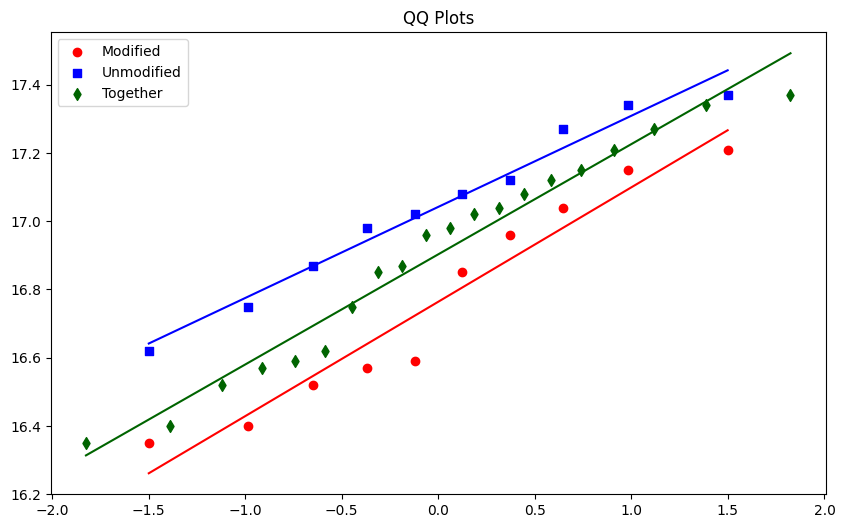

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

def plot_qq(data, color, marker, label):
    (osm, osr), (slope, intercept, r) = stats.probplot(data, plot=None, fit=True)
    ax.scatter(osm, osr, color=color, marker=marker, label=label)  # Plot scatter points
    ax.plot(osm, slope * osm + intercept, color=color)  # Plot the QQ line

# Plotting QQ plot for y1, y2, and combined y1 and y2
plot_qq(y1, 'red', 'o', 'Modified')
plot_qq(y2, 'blue', 's', 'Unmodified')
plot_qq(np.concatenate((y1, y2)), 'darkgreen', 'd', 'Together')

ax.legend()
plt.title('QQ Plots')
plt.show()


In [26]:
%%R


var.test(y1, y2, ratio = 1, alternative = "two.sided", conf.level = 0.95)
var.test(y1, y2, ratio = 1, alternative = "two.sided", conf.level = 0.99)
t.test(y1, y2 , alternative = "two.sided", mu = 0, paired = FALSE, var.equal = TRUE, conf.level = 0.95)
t.test(y1, y2 , alternative = "two.sided", mu = 0, paired = FALSE, var.equal = TRUE, conf.level = 0.99)
t.test(y1, y2 , alternative = "two.sided", mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)
t.test(y1, y2 , alternative = "two.sided", mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.99)
n1 = length(y1)
n2 = length(y2)
S1 = sd(y1)
S2 = sd(y2)
Sp2 = ((n1-1)*S1^2 + (n2-1)*S2^2)/(n1+n2-2)
Sp = sqrt(Sp2)
t0 = (mean(y1) - mean(y2))/(Sp*sqrt(1/n1 + 1/n2))
qt(.975, df = 18)
qt(.025, df = 18)

[1] -2.100922


In [ ]:
%%R
L_CI = (mean(y1) - mean(y2) - qt(.975, df = 18)*Sp*sqrt(1/n1 + 1/n2))
U_CI = (mean(y1) - mean(y2) + qt(.975, df = 18)*Sp*sqrt(1/n1 + 1/n2))
L_CI
U_CI

[1] -0.5450734

[1] -0.01092661

In [ ]:
%%R
install.packages("nortest")
#install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Performs the test of normality.

In [ ]:
%%R
shapiro.test(y1)
ks.test(y1, "pnorm", mean(y1), sd(y1))

ad.test(y1)
shapiro.test(y2)
ks.test(y2, "pnorm", mean(y2), sd(y2))
ad.test(y2)
shapiro.test(y)
ks.test(y, "pnorm", mean(y), sd(y))
ad.test(y)


	Shapiro-Wilk normality test

data:  y1
W = 0.91863, p-value = 0.3457



	Exact one-sample Kolmogorov-Smirnov test

data:  y1
D = 0.20879, p-value = 0.7027
alternative hypothesis: two-sided



	Anderson-Darling normality test

data:  y1
A = 0.3528, p-value = 0.3883



	Shapiro-Wilk normality test

data:  y2
W = 0.96262, p-value = 0.8153



	Exact one-sample Kolmogorov-Smirnov test

data:  y2
D = 0.12113, p-value = 0.9943
alternative hypothesis: two-sided



	Anderson-Darling normality test

data:  y2
A = 0.16997, p-value = 0.905



	Shapiro-Wilk normality test

data:  y
W = 0.95404, p-value = 0.4326



	Exact one-sample Kolmogorov-Smirnov test

data:  y
D = 0.12265, p-value = 0.8891
alternative hypothesis: two-sided



	Anderson-Darling normality test

data:  y
A = 0.31394, p-value = 0.5186


pwr.t.test(10, d = NULL, sig.level = 0.05, power = NULL, type = c("two.sample", "one.sample", "paired"), alternative = c("two.sided", less","greater")

power.t.test(n = NULL, delta = NULL, sd = 1, sig.level = 0.05, power = NULL, type = c("two.sample", "one.sample", "paired"),alternative = c("two.sided", "one.sided"), strict = FALSE)

In [ ]:
%%R
diff.t  = abs(mean(y1) - mean(y2))
sigma.t = 0.284

calculation of requiared sample size

In [ ]:
%%R
power.t.test(power = .95,    delta = diff.t, sd = sigma.t, sig.level = 0.05, type = "two.sample", alternative = "two.sided")


     Two-sample t test power calculation 

              n = 28.12152
          delta = 0.278
             sd = 0.284
      sig.level = 0.05
          power = 0.95
    alternative = two.sided

NOTE: n is number in *each* group


calculation of the power of the test

In [ ]:
%%R
power.t.test(n = 10, delta = diff.t, sd = sigma.t, sig.level = 0.05, type = "two.sample", alternative = "two.sided")
pwr.t.test(  n = 10,     d =  (diff.t/sigma.t)   , sig.level = 0.05, type = "two.sample", alternative = "two.sided")
ptab<-cbind(NULL, NULL)       # initalize ptab
for (i in c(.1, .15, .2, .25, .30, .35, .40, .45, .50, 0.55, 0.6)){
pwrt<-power.t.test(sd=0.284,delta=i,power=.8,sig.level=.05,type="two.sample",alternative="two.sided")
ptab<-rbind(ptab, cbind(pwrt$d, pwrt$n))
}
ptab


     Two-sample t test power calculation 

              n = 10
          delta = 0.278
             sd = 0.284
      sig.level = 0.05
          power = 0.544348
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 10
              d = 0.9788732
      sig.level = 0.05
          power = 0.5443747
    alternative = two.sided

NOTE: n is number in *each* group


0.10,127.579349
0.15,57.248340
0.20,32.641699
0.25,21.262358
0.30,15.091376
0.35,11.380938
0.40,8.983092
0.45,7.349080
0.50,6.189589
0.55,5.340252
0.60,4.701882


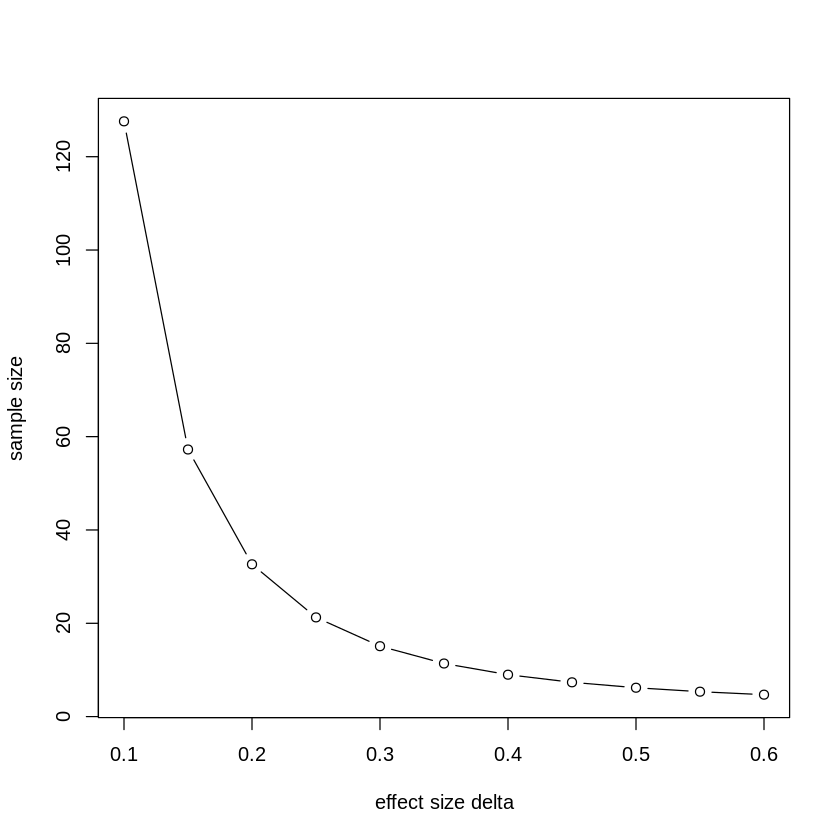

In [ ]:
%%R
#png(paste("Sample_curve.png",sep=""),width = 1200, height = 600)
plot(ptab[,1],ptab[,2],type="b",xlab="effect size delta",ylab="sample size")
#par(opar)
#dev.off()

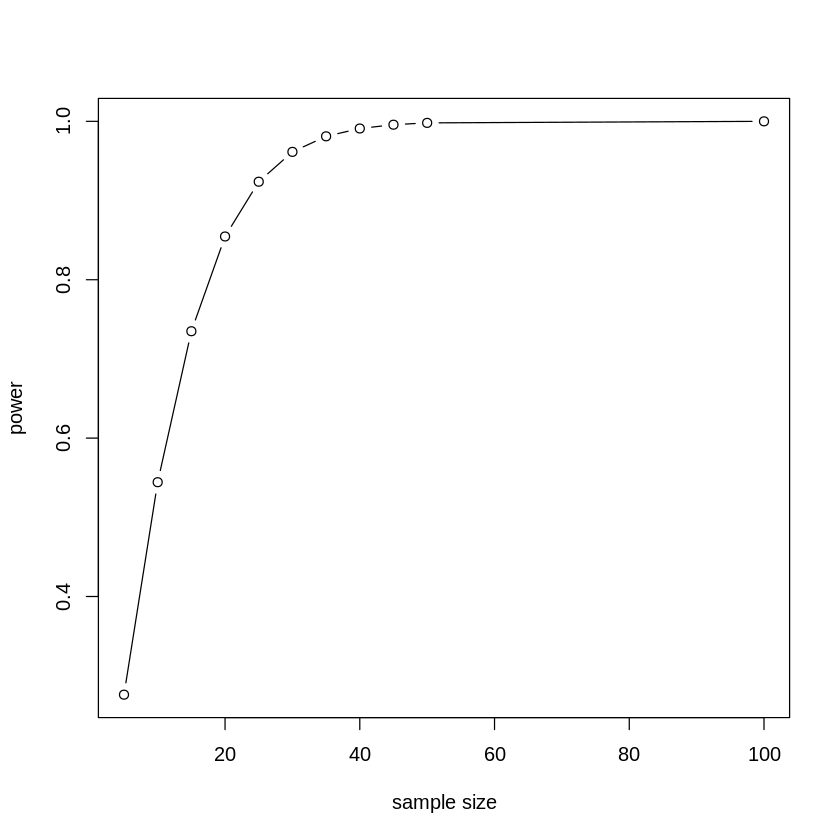

In [ ]:
%%R
pwrt<-power.t.test(delta=0.278, sd=0.284, n=c(5,10,15,20,25,30,35,40,45,50,100),sig.level=.05,type="two.sample",alternative="two.sided")
#png(paste("Power_curve.png",sep=""),width = 1200, height = 600)
plot(pwrt$n,pwrt$power,type="b",xlab="sample size",ylab="power")
#par(opar)
#dev.off()

ANOVA test - (will be done in the second lecture)

In [ ]:
%%R
data.cement = data.frame(Response =(c(y1,y2)), Factor =  c(rep("Modified",10), (rep("Unmodified",10))))
summary(aov(Response~Factor,data=data.cement))
anova(lm(Response~Factor,data=data.cement))
anova(lm(Response~Factor-1,data=data.cement))

            Df Sum Sq Mean Sq F value Pr(>F)  
Factor       1 0.3864  0.3864   4.782 0.0422 *
Residuals   18 1.4544  0.0808                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Factor,1,0.38642,0.38642,4.782426,0.04219672
Residuals,18,1.45440,0.08080,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Factor,2,5714.6146,2857.3073,35362.71,4.469692e-33
Residuals,18,1.4544,0.0808,NA,NA


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower

# Define the datasets
y1 = np.array([16.85, 16.40, 17.21, 16.35, 16.52, 17.04, 16.96, 17.15, 16.59, 16.57])
y2 = np.array([16.62, 16.75, 17.37, 17.12, 16.98, 16.87, 17.34, 17.02, 17.08, 17.27])
y = np.concatenate((y1, y2))

# Create a DataFrame
cement_data = pd.DataFrame({
    'Strength': np.concatenate((y1, y2)),
    'Modification': ['Modified'] * len(y1) + ['Unmodified'] * len(y2)
})

print(cement_data.describe())
print(cement_data.info())

# Variance test
print(stats.levene(y1, y2))

# t-tests
print(stats.ttest_ind(y1, y2, equal_var=True))
print(stats.ttest_ind(y1, y2, equal_var=False))

# Confidence Interval
n1, n2 = len(y1), len(y2)
s1, s2 = np.std(y1, ddof=1), np.std(y2, ddof=1)
sp2 = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)
sp = np.sqrt(sp2)
t0 = (np.mean(y1) - np.mean(y2)) / (sp * np.sqrt(1 / n1 + 1 / n2))
df = n1 + n2 - 2
alpha = 0.05
t_alpha_over_2 = stats.t.ppf(1 - alpha / 2, df)

L_CI = (np.mean(y1) - np.mean(y2) - t_alpha_over_2 * sp * np.sqrt(1 / n1 + 1 / n2))
U_CI = (np.mean(y1) - np.mean(y2) + t_alpha_over_2 * sp * np.sqrt(1 / n1 + 1 / n2))
print("Confidence Interval: [{}, {}]".format(L_CI, U_CI))

# Test of Normality
print(stats.shapiro(y1))
print(stats.shapiro(y2))
print(stats.shapiro(y))
print(stats.kstest(y1, 'norm', args=(np.mean(y1), np.std(y1, ddof=1))))
print(stats.kstest(y2, 'norm', args=(np.mean(y2), np.std(y2, ddof=1))))
print(stats.kstest(y, 'norm', args=(np.mean(y), np.std(y, ddof=1))))


        Strength
count  20.000000
mean   16.903000
std     0.311264
min    16.350000
25%    16.612500
50%    16.970000
75%    17.127500
max    17.370000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Strength      20 non-null     float64
 1   Modification  20 non-null     object 
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes
None
LeveneResult(statistic=1.9527675276752943, pvalue=0.1792770046303289)
TtestResult(statistic=-2.1868757949582633, pvalue=0.0421967159248899, df=18.0)
TtestResult(statistic=-2.1868757949582633, pvalue=0.042998380088903033, df=17.02484516235282)
Confidence Interval: [-0.5450733877678422, -0.010926612232162347]
ShapiroResult(statistic=0.9186335802078247, pvalue=0.345699280500412)
ShapiroResult(statistic=0.9626193642616272, pvalue=0.8152778744697571)
ShapiroResult(statistic=0.9540401697158813, pvalue=0.43259587

In [31]:

# Power and Sample Size Calculation
effect_size = np.abs(np.mean(y1) - np.mean(y2)) / sigma.t
analysis = TTestIndPower()
print(analysis.solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, power=0.95, ratio=1))
print(analysis.solve_power(effect_size=effect_size, nobs1=10, alpha=0.05, power=None, ratio=1))

# Power Curve
effect_sizes = np.array([0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.6])
sample_sizes = [analysis.solve_power(effect_size=e, nobs1=None, alpha=0.05, power=0.8, ratio=1) for e in effect_sizes]

plt.figure(figsize=(10,5))
plt.plot(effect_sizes, sample_sizes, 'o-')
plt.xlabel('Effect Size')
plt.ylabel('Sample Size')
plt.title('Sample Size Curve')
plt.savefig('Sample_curve.png')
plt.show()

# ANOVA Test
anova_model = ols('Strength ~ Modification', data=cement_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)


NameError: ignored